# Visualization

## Introduction
This chapter introduces the concept of visualization. We explore the
motivations for using visualization as part of a quantitative public policy
analysis. The Python visualization ecosystem is large and rapidly growing - in
this chapter we focus on a select set of visualization packages that will cover many of the
types of visualization we will have need for in QM4PP. Those types of
visualization vary in function of the way our data sets are organized, so we
make a distinction between the particular forms of visualization appropriate for
different types of data.

## Purposes of Visualization 

In public policy data analysis, visualization can be adopted for multiple purposes.
Visual _exploration_ of your data is a critically important early step in any
analysis. Exploration affords us the opportunity to examine our data from
multiple perspectives using different types of graphical designs. These
different perspectives can work together to help build up our understanding of
different dimensions of our data set.

Exploration can also be critical in spotting aberrant observations in our data
set that may warrant closer examination. Aberrant observations are those with
values that seem extreme in some sense. These could be due to data entry or
encoding errors in which case the values need to be corrected before moving on
to subsequent statistical analysis. Or, the values could be correct and these
extreme values may reflect important observations that we need to keep in mind
in further analysis.

We will also use visual exploration when exploring relationships between
variables in our data sets and in the modeling stages of analysis. Here
visualization can serve as a diagnostic tool to evaluate the statistical fit of
our models, and again, identify key observations that may have inordinate
influence on the overall estimated relationship.

The second main purpose for visualization in quantitative public policy data
analysis is for _communication_. Once we have carried out our exploratory and
model fitting and interpretation phases, our next step is to prepare our
results with visualizations that convey our analysis story. The visualizations
we develop here will be intended to publication, meaning for consumption by
others.

Indeed the word "publication" suggests that this form of visualization
is public. This is in contrast to the visualization we carry out in earlier
steps of the data analytic workflow where we are exploring the data set,
fitting models, running diagnostics. The visualizations we
are creating in these phases are intended for our own consumption. In other
words, this is "private visualization". 

This is to say that in private visualizations, the views we create should be
viewed as means to an end. Because effective design of a visualization for a
publication takes a good deal of planning, we should postpone those decisions
during exploration so as to not impede the data analysis and modeling process. 

That said, the extent to which visualizations will be effective in any of these modes has
a great deal to do with what particular type of visualization we adopt, and how
that visualization is implemented. As we will see below, the "how" relates to
our design choices that will have major implications for the aesthetics of our
visualization.[^vizref]

[^vizref]: Effective visualization is a complex topic that is beyond the scope of this
chapter. Interested readers are directed to {cite}`Healy_2019,tufte2001visual`
for more comprehensive treatments.

## Python Visualization Ecosystem
The Python ecosystem offers a rich, and even overwhelming, set of choices for
visualization packages. Indeed, this part of the scientific stack moves at a
rapid pace, with new packages appearing and new enhancements to existing
packages being the norm.

An exhaustive coverage of this ecosystem is clearly beyond the scope of the
current chapter.[^pyviz] Instead, we focus on two of the core packages in the
ecosystem: **seaborn** and **matplotlib**.

[^pyviz]: For an extensive overview of visualization in Python see [Lafuente (2020)](https://towardsdatascience.com/complete-guide-to-data-visualization-with-python-2dd74df12b5e).



We will begin with **seaborn** and we import the package with:

In [20]:
import seaborn as sns
sns.set()

in the first statement we are aliasing seaborn as `sns` and in the second
statement we set some styling conventions that seaborn offers.



## Types of Visualization

We will utilize our COVID data that we processed in the previous chapter:

In [21]:
import pandas

df = pandas.read_csv('data/covid/covid_combined.csv', index_col='date', parse_dates=True)

Recall that there were different types of data sets we could form from this
information:

- cross-sectional
- time-series
- cross-sectional and time-series

In designing an effective visualization, we need to be cognizant of the type of
data and what we want to emphasize. Which particular form of visualization is
appropriate will be a function of these two aspects of our analysis.




## Cross-sectional visualization

To illustrate visualizations for cross-sectional data we will create a DF that
has the records for the last date in the larger COVID dataset:

In [22]:
last_df = df.loc['2020-08-02']
last_df.head()

,state,fips,cases,deaths,dtc100,population,deaths100k
date,,,,,,,
2020-08-02,Washington,53,60161,1680,2.792507,7614893,22.062030
2020-08-02,Illinois,17,183662,7718,4.202285,12671821,60.906795
2020-08-02,California,6,515937,9399,1.821734,39512223,23.787576
2020-08-02,Arizona,4,178473,3769,2.111804,7278717,51.781104
2020-08-02,Massachusetts,25,118458,8638,7.292036,6949503,124.296658


With this dataset in hand, the first statistical view we will examine is the
distribution of values for the `deaths100k` (COVID deaths per 100,000
population) variable:

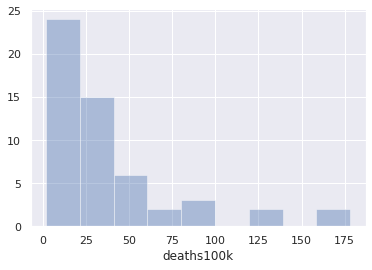

In [23]:
_ = sns.distplot(last_df.deaths100k, hist=True, kde=False)

This is a [histogram](https://datavizcatalogue.com/methods/histogram.html) that has discretized the distribution to display the
frequency with which values fall within specific intervals.
The `x-axis` reports the values for the death rate that define the intervals,
and the `y-axis` is the count of how many observations have values falling into
a specific interval.

As we will explore more fully in the next chapter, the shape of the histogram
conveys important information about the distribution. This is a positively skewed
distribution with a long right tail, meaning that the observations are
concentrated in the lower value intervals, with a few observations falling in
the high intervals.


A different view of the distribution's shape can be obtained with a change to
the arguments to the `distplot` method:

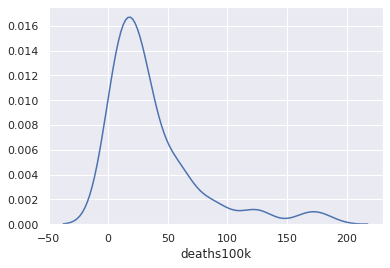

In [24]:
_ = sns.distplot(last_df.deaths100k, hist=False, kde=True)

We can plot both the histogram and the density together, using the default call
for `distplot`:

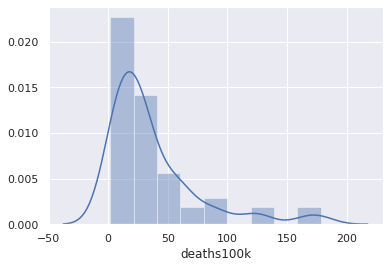

In [25]:
_ = sns.distplot(last_df.deaths100k)

An additional change to the call can offer further insights on the
distribution:

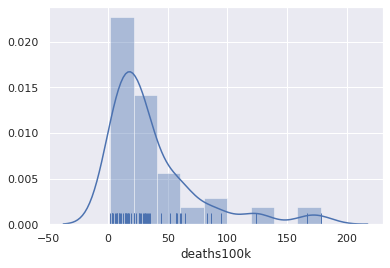

In [26]:
_ = sns.distplot(last_df.deaths100k, rug=True)

In addition to the density and histogram, we now have the "rug" which uses
small ticks to indicate the value location of each observation. This increases
the amount of information in the visualization, particularly if we focus on the
next-to-last bar in the histogram where we can see the particular values fall
towards the lower end of that interval.


The density and histogram plots give us an overall view of the distribution,
and while the rug plot adds further information about the position of
individual observations in the distribution, we do not know what the identity
of those observations are. We can explore state-specific locations in the
attribute distribution using an alternative type of figure:

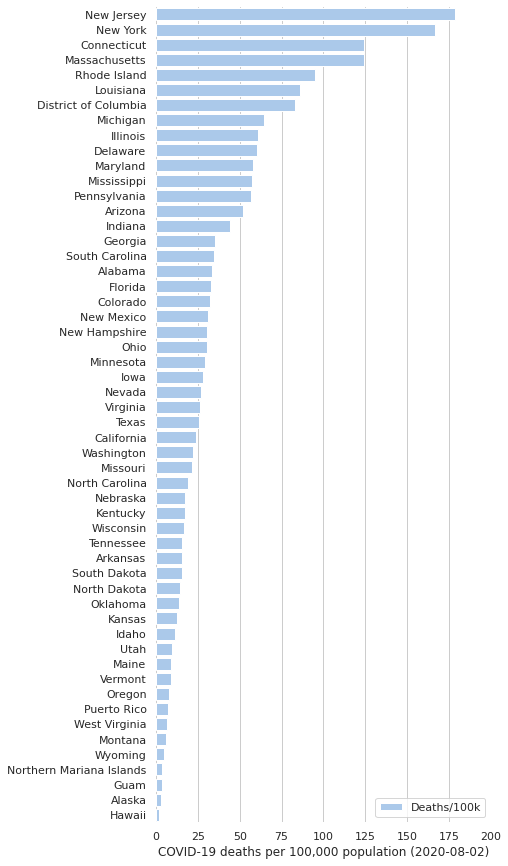

In [27]:
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the deaths100k
sns.set_color_codes("pastel")
sns.barplot(x="deaths100k", y="state", data=last_df.sort_values('deaths100k',ascending=False),
            label="Deaths/100k", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 200), ylabel="",
       xlabel="COVID-19 deaths per 100,000 population (2020-08-02)")
sns.despine(left=True, bottom=True)


Here we have imported the `plt` function from **matplotlib*** package which is the workhorse of
visualization in Python. We then create what are know as a `figure` and `axis`
objects, stored respectively in the variables `f` and `ax`. Prior to this
graphic, we had been using **seaborn's** _figure-level_functions. These are
designed to be optimized for exploratory visualization and they do so by hiding
the complexity of underlying **matplotlib** package. 

In this last figure, we are combing the figure-level plot with an _axes-level_
plot. This allows for more complex design of the graphic, as the figure-level
function does the core drawing of our figure, while the axes-level functions
let us use more complex axes that may or may not have associated seaborn plots.


- joint plots
## Geovisualization

When the cross-sectional units are organized in space, methods of _geovisualization_ provide for the visual exploration of the attribute distribution. Geovisualization is a large, and growing, field, so here we focus only on an introduction to the most commonly encountered types of geovisualization for public policy analysis.

Choropleth maps are effective ways to summarize the spatial distribution of an attribute that is measured for area (i.e., polygons) units. Our COVID data is recorded for States, which are polygons, so choropelth maps are certainly relevant. The issue is, we don't have the polygons, only the attribute data. So before we visualize the spatial distribution of COVID, we need to solve two problems:

1. Obtain the polygons
2. Integrate the polygons with the COVID data

To address these tasks we will utilize the package [geopandas](https://geopandas.org).

In [28]:
import geopandas
gdf = geopandas.read_file('data/covid/gz_2010_us_040_00_500k.json')
gdf.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


Here we are reading a file that contains the coordinates for the state polygons in what is known as [geojson](https://en.wikipedia.org/wiki/GeoJSON) format. Geopandas is capable of reading this format, and creates a `GeoDataFrame` that we have assigned into the variable `gdf`.

In [29]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

The GeoDataFrame is an extension of the pandas DataFrame that includes a `geometry` column. This can be seen by scrolling to the right of the output cell above. The `geometry` column is a `GeoSeries` that stores the coordinates for each observation's spatial representation. For example, the first record is `Maine` which has a geometry encoded as a [MULTIPOLYGON](https://en.wikipedia.org/wiki/GeoJSON#Geometries).


The `GeoDataFrame` has a `plot` method that we can call to visualize these geometries:

<AxesSubplot:>

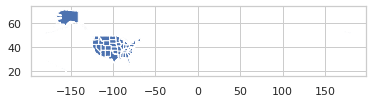

In [30]:
gdf.plot()

The coordinates on the x-axis are [longitude](https://www.w3.org/2015/spatial/wiki/Coordinate_Reference_Systems), while the y-axis measures [latitude](https://www.w3.org/2015/spatial/wiki/Coordinate_Reference_Systems). This is a good start, but not ideal as there is a lot of white space in the plot. We will fix that shortly.

For now let's turn our attention to integrating these coordinates with our COVID data. We can make use of a table join, similar to what we did in the previous chapter. We know that in order to join two DataFrames, we need to have a field that is common to both DataFrames. In, the GeoDataFrame, we see the column 'NAME' that holds the State name. We can rename this column to make our life easier:

In [31]:
gdf.rename(columns={'NAME':'state'}, inplace=True)
gdf.head()

,GEO_ID,STATE,state,LSAD,CENSUSAREA,geometry
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ..."
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.60650, -70.82373 ..."
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11579, -88.67563 ..."
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.05770 44.99743, -104.25015 44.9..."
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.05060 37.00040, -114.04999 36.9..."


Now we can carry out the join:

In [32]:
df['date'] = df.index.values
join_gdf = gdf.merge(df, on='state')
join_gdf.head()

,GEO_ID,STATE,state,LSAD,CENSUSAREA,geometry,fips,cases,deaths,dtc100,population,deaths100k,date
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,1,0,0.0,1344212,0.0,2020-03-12
1,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,2,0,0.0,1344212,0.0,2020-03-13
2,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,3,0,0.0,1344212,0.0,2020-03-14
3,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,12,0,0.0,1344212,0.0,2020-03-15
4,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,17,0,0.0,1344212,0.0,2020-03-16


In [33]:
type(join_gdf)

geopandas.geodataframe.GeoDataFrame

````{margin}
```{note}
We could have changed the order of the merge, to join the GDataFrame to the DataFrame, but that would have resulted in a regular DataFrame.
```
````

We have now addressed the two data integration steps above. To handle the large white space in the previous map, we can examine the data more closely by focusing on the last period in the COVID data:

In [34]:
last_gdf = join_gdf[join_gdf.date=='2020-08-02']
last_gdf.state

143                    Maine
327            Massachusetts
473                 Michigan
616                  Montana
767                   Nevada
919               New Jersey
1074                New York
1227          North Carolina
1374                    Ohio
1524            Pennsylvania
1679            Rhode Island
1830               Tennessee
2003                   Texas
2163                    Utah
2358              Washington
2538               Wisconsin
2681             Puerto Rico
2832                Maryland
2975                 Alabama
3119                  Alaska
3309                 Arizona
3454                Arkansas
3645              California
3796                Colorado
3944             Connecticut
4089                Delaware
4238    District of Columbia
4393                 Florida
4547                 Georgia
4697                  Hawaii
4840                   Idaho
5032                Illinois
5182                 Indiana
5330                    Iowa
5479          

We want to focus our attention on the coterminous US, so we are going to drop a few records from the DataFrame:

In [35]:
drop = ['Puerto Rico', 'Alaska', 'Hawaii']
last_gdf = last_gdf[~last_gdf['state'].isin(drop)]
last_gdf.state
join_gdf = join_gdf[~join_gdf['state'].isin(drop)] # keep this around for later


Now we can create a choropleth of one of our COVID variables:

<AxesSubplot:>

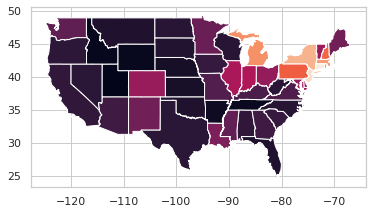

In [36]:
last_gdf.plot(column='dtc100')

The choropleth relies on the color scheme to convey the variation in the values of the `dtc100` attribute, with darker to light hues denoting low to high values for this variable.

We can make the map more informative with a few changes:

<AxesSubplot:>

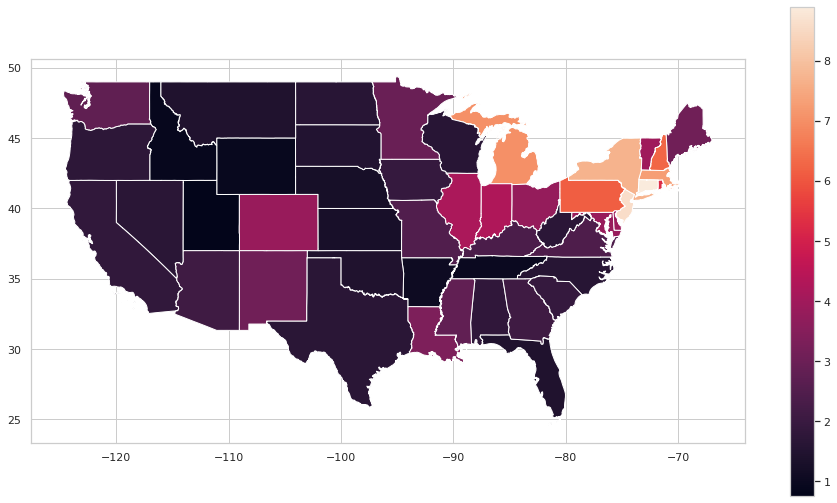

In [37]:
last_gdf.plot(column='dtc100', legend=True, figsize=(16,9))

Now we have a legend (technically, a color bar) to the right of the map, and we have increased the size of the figure.

We can also specify what [classification scheme](https://pysal.org/mapclassify) we would like to use to set the number of classes and to define the class breaks:

<AxesSubplot:>

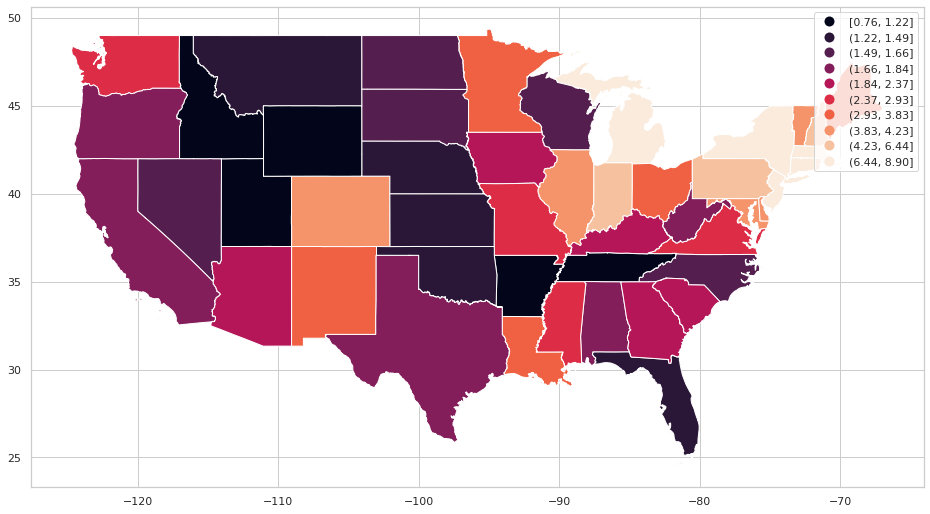

In [38]:
last_gdf.plot(column='dtc100', legend=True, figsize=(16,9),
               scheme='quantiles', k=10)

Here we are using a [decile](https://en.wikipedia.org/wiki/Decile) classification. We see that the legend is now embedded in the frame with the map, but is sitting on top of the north eastern states. Let's move the legend to the lower-right of the frame:

<AxesSubplot:>

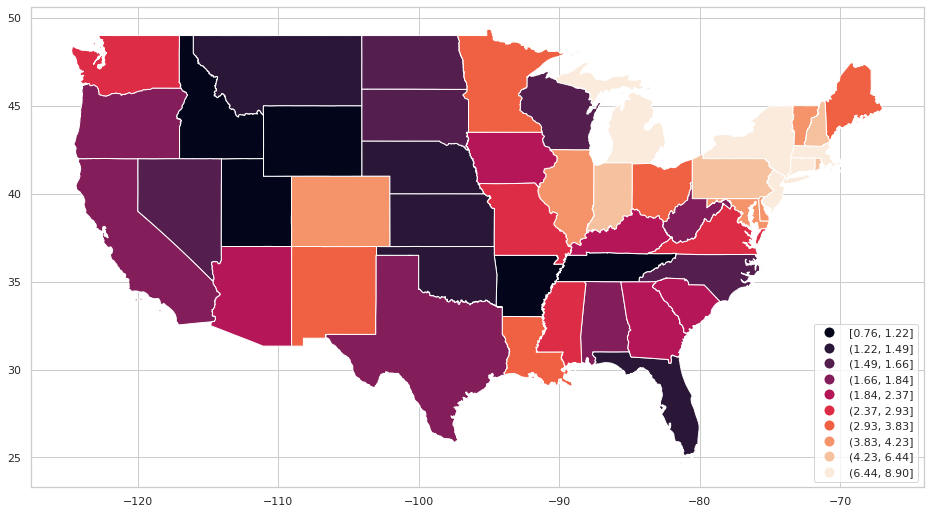

In [39]:
last_gdf.plot(column='dtc100', legend=True, figsize=(16,9),
               scheme='quantiles', k=10,
               legend_kwds={'loc': 'lower right'})

The symbology on the legend tells us how the classes are defined. For example, the first class (first decile) has the definition `[0.76, 1.22]`. This is a _closed interval_ meaning the lower and upper bounds are included: $0.76 \le dtc100_i \le 1.22$. In contrast, the second decile is defined as `(1.22, 1.49]` which is _opened_ on the lower bound, but closed on the upper bound:
$1.22 \lt dc100_i \le 1.49$.  Thus, there is no ambiguity as to the class a given value belongs.


Finally, we can change the color map to one where the darkness of the hue increases with the value of the attribute. We can also can add a title and turn off the axes:

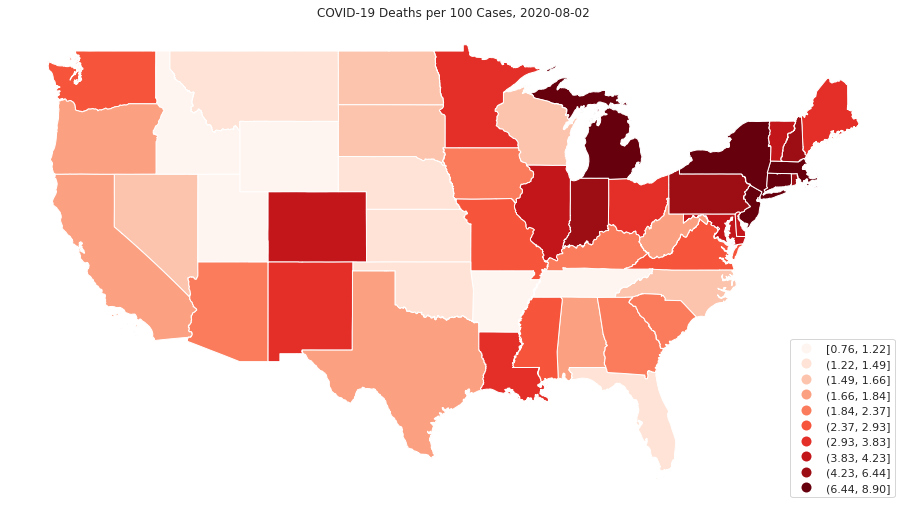

In [40]:
ax = last_gdf.plot(column='dtc100', scheme='quantiles',k=10, legend=True,
             figsize=(16,9), cmap='Reds',
             legend_kwds={'loc': 'lower right'})
ax.set_title('COVID-19 Deaths per 100 Cases, 2020-08-02')
ax.set_axis_off()

## Time Series visualization


- line plots
- trajectories
- comparative plots
- first and second derivatives
- normalize to base for comparison (covid curves examples)

In [41]:
cal_df = df[df.state=='California']
cal_df.shape

(191, 8)

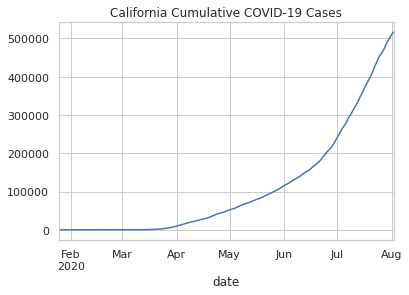

In [42]:
_ = cal_df.cases.plot(title="California Cumulative COVID-19 Cases")

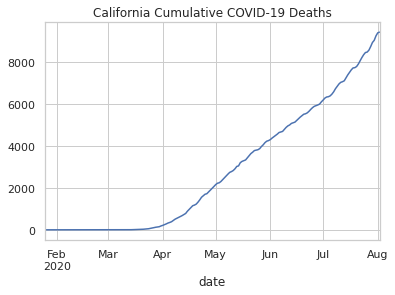

In [43]:
_ = cal_df.deaths.plot(title="California Cumulative COVID-19 Deaths")

/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

<AxesSubplot:xlabel='date'>

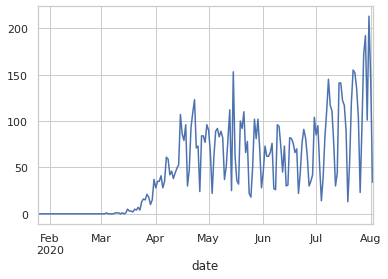

In [44]:
cal_df[['cases_d', 'deaths_d']] = cal_df[['cases', 'deaths']].diff().values
cal_df.fillna(0, inplace=True)
cal_df.deaths_d.plot()

<AxesSubplot:xlabel='date'>

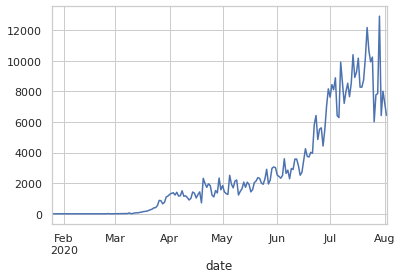

In [45]:
cal_df.cases_d.plot()

In [46]:
import numpy


In [47]:
cal_df = cal_df[cal_df.cases>0]

<AxesSubplot:xlabel='date'>

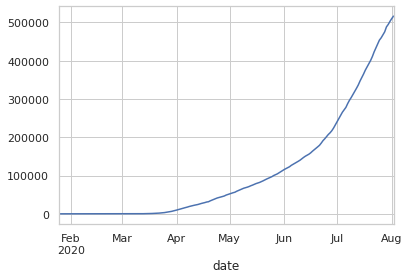

In [48]:
cal_df.cases.plot()

In [49]:
cal_df['cases_ln'] = numpy.log(cal_df.cases)

<AxesSubplot:xlabel='date'>

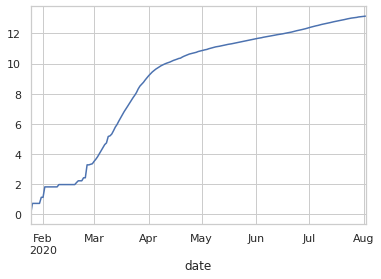

In [50]:
cal_df.cases_ln.plot()

In [51]:
cal_df['deaths_ln'] = numpy.log(cal_df.deaths)

/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<AxesSubplot:xlabel='date'>

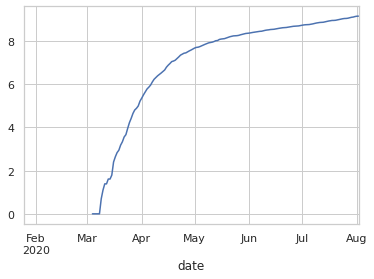

In [52]:
cal_df.deaths_ln.plot()

In [53]:
cal_df.shape

(191, 12)

In [55]:
T = numpy.arange(0, 191)

rates = numpy.arange(0.02, 0.20, 0.04)

rates

array([0.02, 0.06, 0.1 , 0.14, 0.18])

In [57]:
names = []
b = cal_df.cases[0]
for rate in rates:
    name = f'r_{rate*100:0.0f}'
    s = numpy.array([b * (1+rate)**t for t in T])
    cal_df[name] = s
    nl = name+"_ln"
    cal_df[nl] = numpy.log(s)
    names.append(nl)
names.append('cases_ln')

In [58]:
cal_df.head()

,state,fips,cases,deaths,dtc100,population,deaths100k,date,cases_d,deaths_d,...,r_2,r_2_ln,r_6,r_6_ln,r_10,r_10_ln,r_14,r_14_ln,r_18,r_18_ln
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,California,6,1,0,0.0,39512223,0.0,2020-01-25,0.0,0.0,...,1.000000,0.000000,1.000000,0.000000,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
2020-01-26,California,6,2,0,0.0,39512223,0.0,2020-01-26,1.0,0.0,...,1.020000,0.019803,1.060000,0.058269,1.1000,0.095310,1.140000,0.131028,1.180000,0.165514
2020-01-27,California,6,2,0,0.0,39512223,0.0,2020-01-27,0.0,0.0,...,1.040400,0.039605,1.123600,0.116538,1.2100,0.190620,1.299600,0.262057,1.392400,0.331029
2020-01-28,California,6,2,0,0.0,39512223,0.0,2020-01-28,0.0,0.0,...,1.061208,0.059408,1.191016,0.174807,1.3310,0.285931,1.481544,0.393085,1.643032,0.496543
2020-01-29,California,6,2,0,0.0,39512223,0.0,2020-01-29,0.0,0.0,...,1.082432,0.079211,1.262477,0.233076,1.4641,0.381241,1.688960,0.524113,1.938778,0.662058


In [59]:
names

['r_2_ln', 'r_6_ln', 'r_10_ln', 'r_14_ln', 'r_18_ln', 'cases_ln']

<AxesSubplot:xlabel='date'>

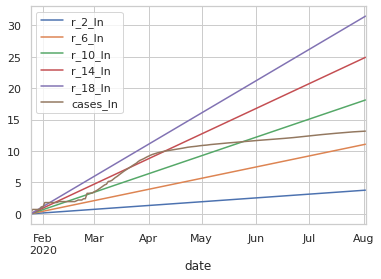

In [60]:
cal_df[names].plot()

In [61]:
cal_df.head()

,state,fips,cases,deaths,dtc100,population,deaths100k,date,cases_d,deaths_d,...,r_2,r_2_ln,r_6,r_6_ln,r_10,r_10_ln,r_14,r_14_ln,r_18,r_18_ln
date,,,,,,,,,,,,,,,,,,,,,
2020-01-25,California,6,1,0,0.0,39512223,0.0,2020-01-25,0.0,0.0,...,1.000000,0.000000,1.000000,0.000000,1.0000,0.000000,1.000000,0.000000,1.000000,0.000000
2020-01-26,California,6,2,0,0.0,39512223,0.0,2020-01-26,1.0,0.0,...,1.020000,0.019803,1.060000,0.058269,1.1000,0.095310,1.140000,0.131028,1.180000,0.165514
2020-01-27,California,6,2,0,0.0,39512223,0.0,2020-01-27,0.0,0.0,...,1.040400,0.039605,1.123600,0.116538,1.2100,0.190620,1.299600,0.262057,1.392400,0.331029
2020-01-28,California,6,2,0,0.0,39512223,0.0,2020-01-28,0.0,0.0,...,1.061208,0.059408,1.191016,0.174807,1.3310,0.285931,1.481544,0.393085,1.643032,0.496543
2020-01-29,California,6,2,0,0.0,39512223,0.0,2020-01-29,0.0,0.0,...,1.082432,0.079211,1.262477,0.233076,1.4641,0.381241,1.688960,0.524113,1.938778,0.662058


In [62]:
r_df = cal_df[['cases_d','deaths_d']].rolling(7).mean()

_ = r_df.cases_d.plot(title="California COVID Daily Cases (7-day rolling average)")

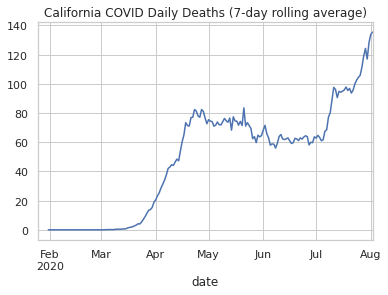

In [66]:
_ = r_df.deaths_d.plot(title="California COVID Daily Deaths (7-day rolling average)")

## Time-Series and Cross-sectional Visualizations

When we have data organized in bot time-series and cross-sectional dimensions,
there are a number of specialized visualzations we can design to exploit the
rich information content.

### Distributional Evolution

For example, we may be interested in how the statistical distribution of an
attribute is evolving over time. To explore this question, let's restructure
the data set slightly to create a new attribute for each observation that
measures the month for the observation. Our interest will be in how these
monthly distributions change over time:

In [67]:
import numpy as np
import pandas as pdM
import seaborn as sns
import matplotlib.pyplot as plMt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

df = pandas.read_csv('data/covid/covid_combined.csv', index_col='date', parse_dates=True)

# m,a,m,j,j,a

df['month'] = df.index.month

df.head()

df.groupby(by='month').count()

month_df = df[(df.month>2) & (df.month<8)]

month_df.head()


,state,fips,cases,deaths,dtc100,population,deaths100k,month
date,,,,,,,,
2020-03-01,Washington,53,17,3,17.647059,7614893,0.039396,3
2020-03-02,Washington,53,23,6,26.086957,7614893,0.078793,3
2020-03-03,Washington,53,32,10,31.250000,7614893,0.131322,3
2020-03-04,Washington,53,47,11,23.404255,7614893,0.144454,3
2020-03-05,Washington,53,75,11,14.666667,7614893,0.144454,3


Let's plot the densities of deaths to cases (100) ratio from different  months on one figure:

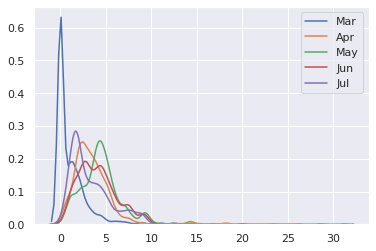

In [68]:
labels = "Mar", "Apr", "May", "Jun", "Jul"
x = month_df.dtc100.values
g = month_df.month.values
df = pandas.DataFrame(dict(x=x, g=g))
sns.set()
for month  in range(3,8):
    df_m = df[df.g==month]
    sns.kdeplot(df_m.x, label=labels[month-3])

Combining the densities from different months overloads the graphic and makes
it difficult to identify the specific months and, therefore, the evolution of
the distributions over time.

A more effective, but complex to develop, visualization to get at this question
is a [joy plot](https://blog.revolutionanalytics.com/2017/07/joyplots.html):

/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()
/home/serge/anaconda3/envs/qm4pp/lib/python3.7/site-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  self.fig.tight_layout()


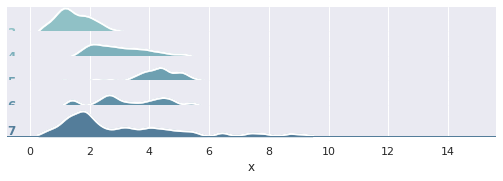

In [69]:
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="g", hue="g", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", cut=1, clip_on=True, clip=(0,15),shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", cut=1,clip_on=True, clip=(0,15), color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=True)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "x")

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

The joy plot makes the evolution of the densities much clearer, as in March the
values were shifted to the left, as the pandemic spreads and intensifies over
April-June the densities shift right and widen. By July, there is some
indication of an improvement as the distribution shifts back to the left.

### Spatial Dynamics
Knowing how the densities are moving over time is an important accomplishment
that the joy plot affords us. There is a lot going on with these dynamics - the
center has shifted over time, the skewness changes, modes appear and disappear
and, the distribution can widen. At the same time, there is a lot about the
dynamics that is hidden in the joy plot. For example, we do not know what is
happening from a geographical perspective over time. In other words, the
_spatial dynamics_ remain unknown.

To explore the spatial dynamics we will revisit the `join` GeoDataFrame we
constructed when first generating maps above:

In [67]:
join_gdf.head()


,GEO_ID,STATE,state,LSAD,CENSUSAREA,geometry,fips,cases,deaths,dtc100,population,deaths100k,date
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,1,0,0.0,1344212,0.0,2020-03-12
1,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,2,0,0.0,1344212,0.0,2020-03-13
2,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,3,0,0.0,1344212,0.0,2020-03-14
3,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,12,0,0.0,1344212,0.0,2020-03-15
4,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",23,17,0,0.0,1344212,0.0,2020-03-16


We will be generating choropleth maps for the first day of the last four months
in the data set:

In [68]:
dates = [f"2020-{month:02}-01"  for month  in range(5,9)]

dates


['2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01']

In [69]:
last4 = join_gdf[join_gdf.date.isin(dates)]
last4.shape


(196, 13)

So we have 49 states in each month.

Next, we want to impose the same classification scheme on each of the months
so that we can see how the _spatial distribution_ changes over time. We will
use the **pysal** package **mapclassify** to generate this classification:

In [71]:
import mapclassify

q10 = mapclassify.Quantiles(last4.dtc100, k=10)

q10


Quantiles           

  Interval     Count
--------------------
[0.76, 1.45] |    20
(1.45, 1.87] |    20
(1.87, 2.46] |    19
(2.46, 3.12] |    20
(3.12, 3.79] |    19
(3.79, 4.20] |    20
(4.20, 4.80] |    19
(4.80, 5.44] |    20
(5.44, 6.95] |    19
(6.95, 9.45] |    20

What we have done here is pooled the data on the attribute `dtc100` over all
four months and calculated the deciles. We can impose those deciles on the maps
from each month as follows:

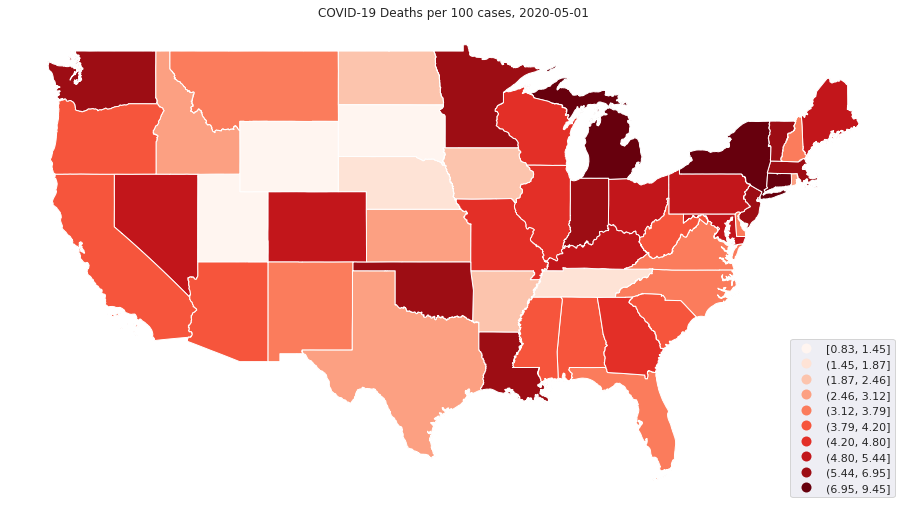

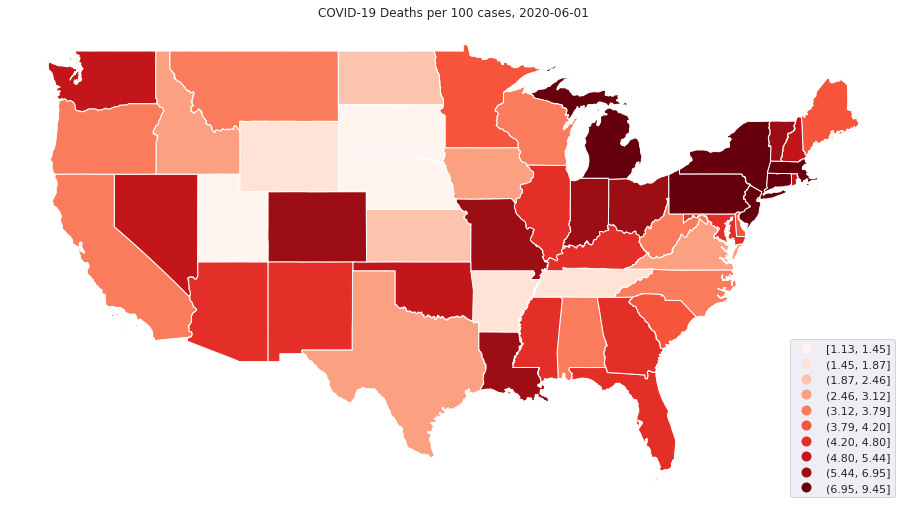

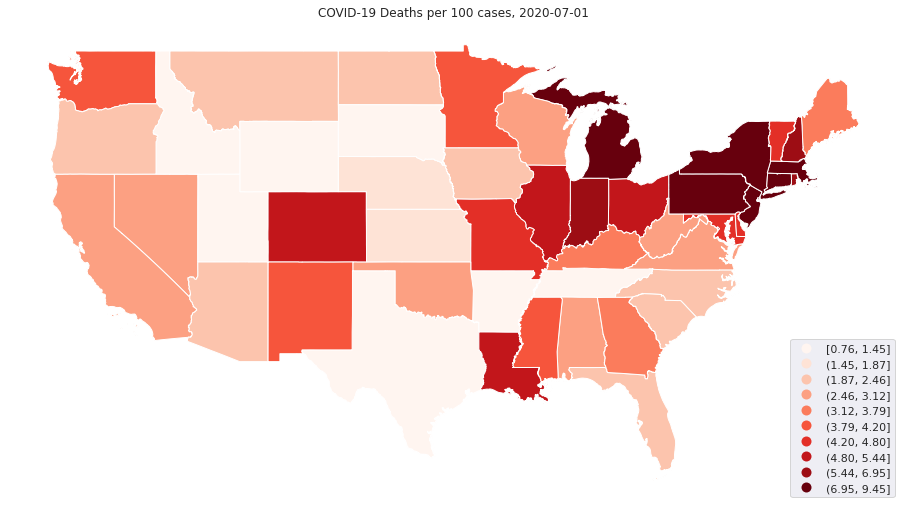

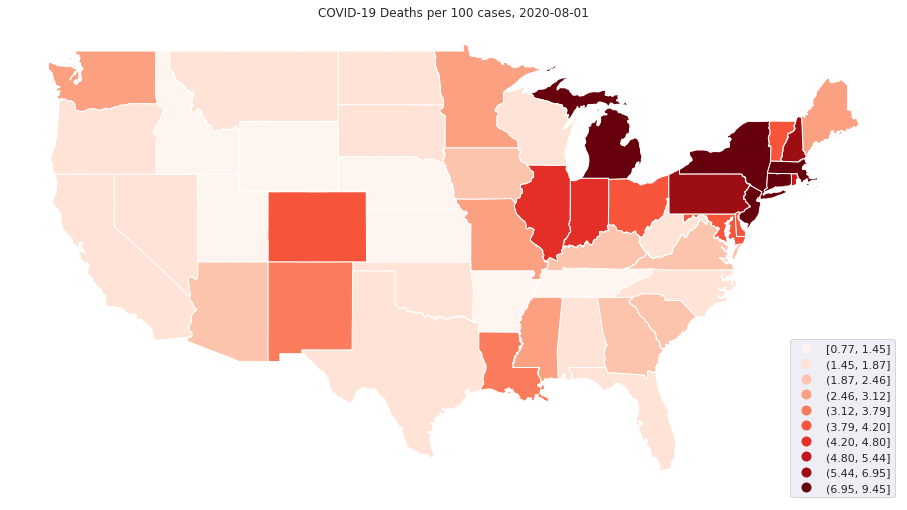

In [72]:
sns.set()
for month in dates:
    ax = last4[last4.date==month].plot(column='dtc100',  scheme='user_defined', classification_kwds={'bins':q10.bins}, legend=True,
             figsize=(16,9), cmap='Reds',
             legend_kwds={'loc': 'lower right'})
    ax.set_title(f'COVID-19 Deaths per 100 cases, {month}')
    ax.set_axis_off()


By comparing the maps from different points in time we can see the spatial
diffusion of COVID-19 throughout the US.